python -m notebook

In [77]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

## 1 Load the dataset

In [78]:
dataset = pd.read_csv('dataset_v3.csv')
dataset.head(20)

,price,initialPriceCurrency,pricePerM2,nbRooms,level,nbLevels,buildingType,totalSurface,livingSurface,dwellingsState,...,nbBathrooms,parking,announceAuthor,housingStock,planning,kitchenSurface,ceilingHeight,region,authorsNick,url
0,255000,255000 €,1700.00,3.0,5,5.0,NaN,150,NaN,NaN,...,2,NaN,Агентство,Новострой,NaN,NaN,NaN,Телецентр,PROTECT IMOBIL,https://999.md/ru/80832447
1,21300,21300 €,1065.00,1.0,5,5.0,NaN,20,NaN,Eвроремонт,...,1,Oткрытое,Частное лицо,Вторичный,Малосемейная,NaN,NaN,Телецентр,tanea2005,https://999.md/ru/80891628
2,58065,58065 €,1055.73,1.0,9,10.0,Kирпичный,55,NaN,Белый вариант,...,1,Подземная,Агентство,Новострой,NaN,NaN,NaN,Буюканы,Vadim-inHub,https://999.md/ru/80891623
3,56000,56000 €,622.22,3.0,7,9.0,Бетон,90,60.0,Косметический pемонт,...,2,Oткрытое,Частное лицо,Вторичный,143,12.0,3.0,Чокана,IvanGM,https://999.md/ru/80400402
4,51500,51500 €,990.38,2.0,9,10.0,NaN,52,NaN,NaN,...,1,Oткрытое,Застройщик,Вторичный,NaN,NaN,NaN,Буюканы,construction-bmb,https://999.md/ru/80891622
5,45600,45600 €,814.29,2.0,3,5.0,Kотельцовый,56,NaN,Косметический pемонт,...,2,Oткрытое,Агентство,Вторичный,Мс (Молд. Серия),NaN,NaN,Ботаника,ariaghe,https://999.md/ru/80890982
6,77900,77900 €,1498.08,1.0,12,17.0,NaN,52,NaN,Eвроремонт,...,1,NaN,Агентство,Новострой,NaN,NaN,NaN,Ботаника,Connect3333,https://999.md/ru/79952352
7,49900,49900 €,907.27,2.0,5,5.0,NaN,55,NaN,Eвроремонт,...,2,Oткрытое,Агентство,Вторичный,NaN,NaN,NaN,Рышкановка,Loyal-Ciocana,https://999.md/ru/79112616
8,53900,53900 €,1056.86,2.0,13,14.0,NaN,51,NaN,Косметический pемонт,...,NaN,NaN,Агентство,Вторичный,NaN,NaN,NaN,Ботаника,Connect3333,https://999.md/ru/79737744
9,61500,61500 €,1366.67,1.0,2,12.0,Kирпичный,45,NaN,Eвроремонт,...,1,NaN,Агентство,Новострой,NaN,NaN,NaN,Телецентр,connect0505,https://999.md/ru/80489801


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16097 entries, 0 to 16096
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 16097 non-null  object 
 1   initialPriceCurrency  16097 non-null  object 
 2   pricePerM2            16013 non-null  float64
 3   nbRooms               15719 non-null  float64
 4   level                 16079 non-null  object 
 5   nbLevels              16079 non-null  float64
 6   buildingType          6407 non-null   object 
 7   totalSurface          16097 non-null  int64  
 8   livingSurface         2246 non-null   float64
 9   dwellingsState        13549 non-null  object 
 10  nbBalconies           10980 non-null  object 
 11  nbBathrooms           13117 non-null  object 
 12  parking               10077 non-null  object 
 13  announceAuthor        16095 non-null  object 
 14  housingStock          16095 non-null  object 
 15  planning           

In [80]:
# drop the record if the price is not indicated
dataset = dataset[dataset['price'].apply(lambda x: str(x).isdigit())]

dataset['level'] = pd.to_numeric(dataset['level'], errors='coerce')
dataset = dataset.replace('Нет', 0)
dataset = dataset.replace('4 и более', 4)
dataset['ceilingHeight'].where(dataset['ceilingHeight'] < 1000, np.NaN, inplace=True)

# dropping test values
dataset.drop(['authorsNick', 'url', 'initialPriceCurrency'], inplace=True, axis=1)

dataset.head(20)

,price,pricePerM2,nbRooms,level,nbLevels,buildingType,totalSurface,livingSurface,dwellingsState,nbBalconies,nbBathrooms,parking,announceAuthor,housingStock,planning,kitchenSurface,ceilingHeight,region
0,255000,1700.00,3.0,5.0,5.0,NaN,150,NaN,NaN,2,2,NaN,Агентство,Новострой,NaN,NaN,NaN,Телецентр
1,21300,1065.00,1.0,5.0,5.0,NaN,20,NaN,Eвроремонт,NaN,1,Oткрытое,Частное лицо,Вторичный,Малосемейная,NaN,NaN,Телецентр
2,58065,1055.73,1.0,9.0,10.0,Kирпичный,55,NaN,Белый вариант,NaN,1,Подземная,Агентство,Новострой,NaN,NaN,NaN,Буюканы
3,56000,622.22,3.0,7.0,9.0,Бетон,90,60.0,Косметический pемонт,2,2,Oткрытое,Частное лицо,Вторичный,143,12.0,3.0,Чокана
4,51500,990.38,2.0,9.0,10.0,NaN,52,NaN,NaN,1,1,Oткрытое,Застройщик,Вторичный,NaN,NaN,NaN,Буюканы
5,45600,814.29,2.0,3.0,5.0,Kотельцовый,56,NaN,Косметический pемонт,2,2,Oткрытое,Агентство,Вторичный,Мс (Молд. Серия),NaN,NaN,Ботаника
6,77900,1498.08,1.0,12.0,17.0,NaN,52,NaN,Eвроремонт,1,1,NaN,Агентство,Новострой,NaN,NaN,NaN,Ботаника
7,49900,907.27,2.0,5.0,5.0,NaN,55,NaN,Eвроремонт,1,2,Oткрытое,Агентство,Вторичный,NaN,NaN,NaN,Рышкановка
8,53900,1056.86,2.0,13.0,14.0,NaN,51,NaN,Косметический pемонт,NaN,NaN,NaN,Агентство,Вторичный,NaN,NaN,NaN,Ботаника
9,61500,1366.67,1.0,2.0,12.0,Kирпичный,45,NaN,Eвроремонт,1,1,NaN,Агентство,Новострой,NaN,NaN,NaN,Телецентр


In [81]:
dataset['price'] = dataset['price'].astype('float')
dataset['nbRooms'] = dataset['nbRooms'].astype('float')
dataset['level'] = dataset['level'].astype('float', errors='ignore')
dataset['nbLevels'] = dataset['nbLevels'].astype('float')
dataset['buildingType'] = dataset['buildingType'].astype('category')
dataset['totalSurface'] = dataset['totalSurface'].astype('float')
dataset['livingSurface'] = dataset['livingSurface'].astype('float')
dataset['dwellingsState'] = dataset['dwellingsState'].astype('category')
dataset['nbBalconies'] = dataset['nbBalconies'].astype('float')
dataset['nbBathrooms'] = dataset['nbBathrooms'].astype('float')
dataset['parking'] = dataset['parking'].astype('category')
dataset['announceAuthor'] = dataset['announceAuthor'].astype('category')
dataset['housingStock'] = dataset['housingStock'].astype('category')
dataset['planning'] = dataset['planning'].astype('category')
dataset['kitchenSurface'] = dataset['kitchenSurface'].astype('float')
dataset['ceilingHeight'] = dataset['ceilingHeight'].astype('float')
dataset['region'] = dataset['region'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16012 entries, 0 to 16096
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           16012 non-null  float64 
 1   pricePerM2      16012 non-null  float64 
 2   nbRooms         15637 non-null  float64 
 3   level           15936 non-null  float64 
 4   nbLevels        16012 non-null  float64 
 5   buildingType    6342 non-null   category
 6   totalSurface    16012 non-null  float64 
 7   livingSurface   2231 non-null   float64 
 8   dwellingsState  13478 non-null  category
 9   nbBalconies     10916 non-null  float64 
 10  nbBathrooms     13054 non-null  float64 
 11  parking         10011 non-null  category
 12  announceAuthor  16010 non-null  category
 13  housingStock    16010 non-null  category
 14  planning        5624 non-null   category
 15  kitchenSurface  1528 non-null   float64 
 16  ceilingHeight   1439 non-null   float64 
 17  region      

In [82]:
stats_dataset = dataset.describe()
stats_dataset.loc['range'] = stats_dataset.loc['max'] - stats_dataset.loc['min']
stats_dataset.loc['skewness'] = stats_dataset.skew()
stats_dataset.loc['kurtosis'] = stats_dataset.kurt()
stats_dataset['price'] = stats_dataset['price'].round()
stats_dataset

,price,pricePerM2,nbRooms,level,nbLevels,totalSurface,livingSurface,nbBalconies,nbBathrooms,kitchenSurface,ceilingHeight
count,16012.0,16012.000000,15637.000000,15936.000000,16012.000000,16012.000000,2231.000000,10916.000000,13054.000000,1528.000000,1439.000000
mean,74410.0,1087.872922,2.148302,5.436308,9.428741,68.211466,56.317346,1.227006,1.408840,13.909686,250.068103
std,47059.0,602.317176,0.835967,3.538726,3.872183,53.806302,121.576168,0.617168,0.527278,9.439551,85.091889
min,1.0,0.030000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,48000.0,875.000000,2.000000,3.000000,6.000000,49.000000,31.000000,1.000000,1.000000,8.000000,260.000000
50%,65000.0,1017.310000,2.000000,5.000000,9.000000,65.000000,49.000000,1.000000,1.000000,12.000000,275.000000
75%,87700.0,1223.680000,3.000000,8.000000,11.000000,79.000000,70.000000,1.000000,2.000000,16.000000,280.000000
max,850000.0,45000.000000,5.000000,21.000000,24.000000,5050.000000,5050.000000,4.000000,4.000000,104.000000,500.000000
range,849999.0,44999.970000,4.000000,20.000000,23.000000,5049.000000,5049.000000,4.000000,3.000000,104.000000,500.000000
skewness,2.0,1.380185,3.000000,2.999989,2.999987,2.203219,1.269524,2.999999,3.000000,2.961958,2.175364


In [83]:
# dropping the values that are present in less that 50% of records
dataset.drop(['livingSurface', 'kitchenSurface', 'ceilingHeight', 'buildingType', 'planning'], inplace=True, axis=1)
stats_dataset.drop(['livingSurface', 'kitchenSurface', 'ceilingHeight'], inplace=True, axis=1)
stats_dataset

,price,pricePerM2,nbRooms,level,nbLevels,totalSurface,nbBalconies,nbBathrooms
count,16012.0,16012.000000,15637.000000,15936.000000,16012.000000,16012.000000,10916.000000,13054.000000
mean,74410.0,1087.872922,2.148302,5.436308,9.428741,68.211466,1.227006,1.408840
std,47059.0,602.317176,0.835967,3.538726,3.872183,53.806302,0.617168,0.527278
min,1.0,0.030000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,48000.0,875.000000,2.000000,3.000000,6.000000,49.000000,1.000000,1.000000
50%,65000.0,1017.310000,2.000000,5.000000,9.000000,65.000000,1.000000,1.000000
75%,87700.0,1223.680000,3.000000,8.000000,11.000000,79.000000,1.000000,2.000000
max,850000.0,45000.000000,5.000000,21.000000,24.000000,5050.000000,4.000000,4.000000
range,849999.0,44999.970000,4.000000,20.000000,23.000000,5049.000000,4.000000,3.000000
skewness,2.0,1.380185,3.000000,2.999989,2.999987,2.203219,2.999999,3.000000


In [84]:
dataset.head(20)

,price,pricePerM2,nbRooms,level,nbLevels,totalSurface,dwellingsState,nbBalconies,nbBathrooms,parking,announceAuthor,housingStock,region
0,255000.0,1700.00,3.0,5.0,5.0,150.0,NaN,2.0,2.0,NaN,Агентство,Новострой,Телецентр
1,21300.0,1065.00,1.0,5.0,5.0,20.0,Eвроремонт,NaN,1.0,Oткрытое,Частное лицо,Вторичный,Телецентр
2,58065.0,1055.73,1.0,9.0,10.0,55.0,Белый вариант,NaN,1.0,Подземная,Агентство,Новострой,Буюканы
3,56000.0,622.22,3.0,7.0,9.0,90.0,Косметический pемонт,2.0,2.0,Oткрытое,Частное лицо,Вторичный,Чокана
4,51500.0,990.38,2.0,9.0,10.0,52.0,NaN,1.0,1.0,Oткрытое,Застройщик,Вторичный,Буюканы
5,45600.0,814.29,2.0,3.0,5.0,56.0,Косметический pемонт,2.0,2.0,Oткрытое,Агентство,Вторичный,Ботаника
6,77900.0,1498.08,1.0,12.0,17.0,52.0,Eвроремонт,1.0,1.0,NaN,Агентство,Новострой,Ботаника
7,49900.0,907.27,2.0,5.0,5.0,55.0,Eвроремонт,1.0,2.0,Oткрытое,Агентство,Вторичный,Рышкановка
8,53900.0,1056.86,2.0,13.0,14.0,51.0,Косметический pемонт,NaN,NaN,NaN,Агентство,Вторичный,Ботаника
9,61500.0,1366.67,1.0,2.0,12.0,45.0,Eвроремонт,1.0,1.0,NaN,Агентство,Новострой,Телецентр


In [85]:
print(dataset.isnull().sum())

price                0
pricePerM2           0
nbRooms            375
level               76
nbLevels             0
totalSurface         0
dwellingsState    2534
nbBalconies       5096
nbBathrooms       2958
parking           6001
announceAuthor       2
housingStock         2
region               0
dtype: int64


In [86]:
# Replacing NaN values

# mode() for categorical values
dataset['dwellingsState'] = dataset['dwellingsState'].fillna(dataset['dwellingsState'].mode())
dataset['parking'] = dataset['parking'].fillna(dataset['parking'].mode())
dataset['announceAuthor'] = dataset['announceAuthor'].fillna(dataset['announceAuthor'].mode())
dataset['housingStock'] = dataset['housingStock'].fillna(dataset['housingStock'].mode())

# mean() for values with: skewness < 1

# median() for values with: skewness > 1
dataset['nbRooms'] = dataset['nbRooms'].fillna(dataset['nbRooms'].median())
dataset['level'] = dataset['level'].fillna(dataset['level'].median())
dataset['nbBalconies'] = dataset['nbBalconies'].fillna(dataset['nbBalconies'].median())
dataset['nbBathrooms'] = dataset['nbBathrooms'].fillna(dataset['nbBathrooms'].median())

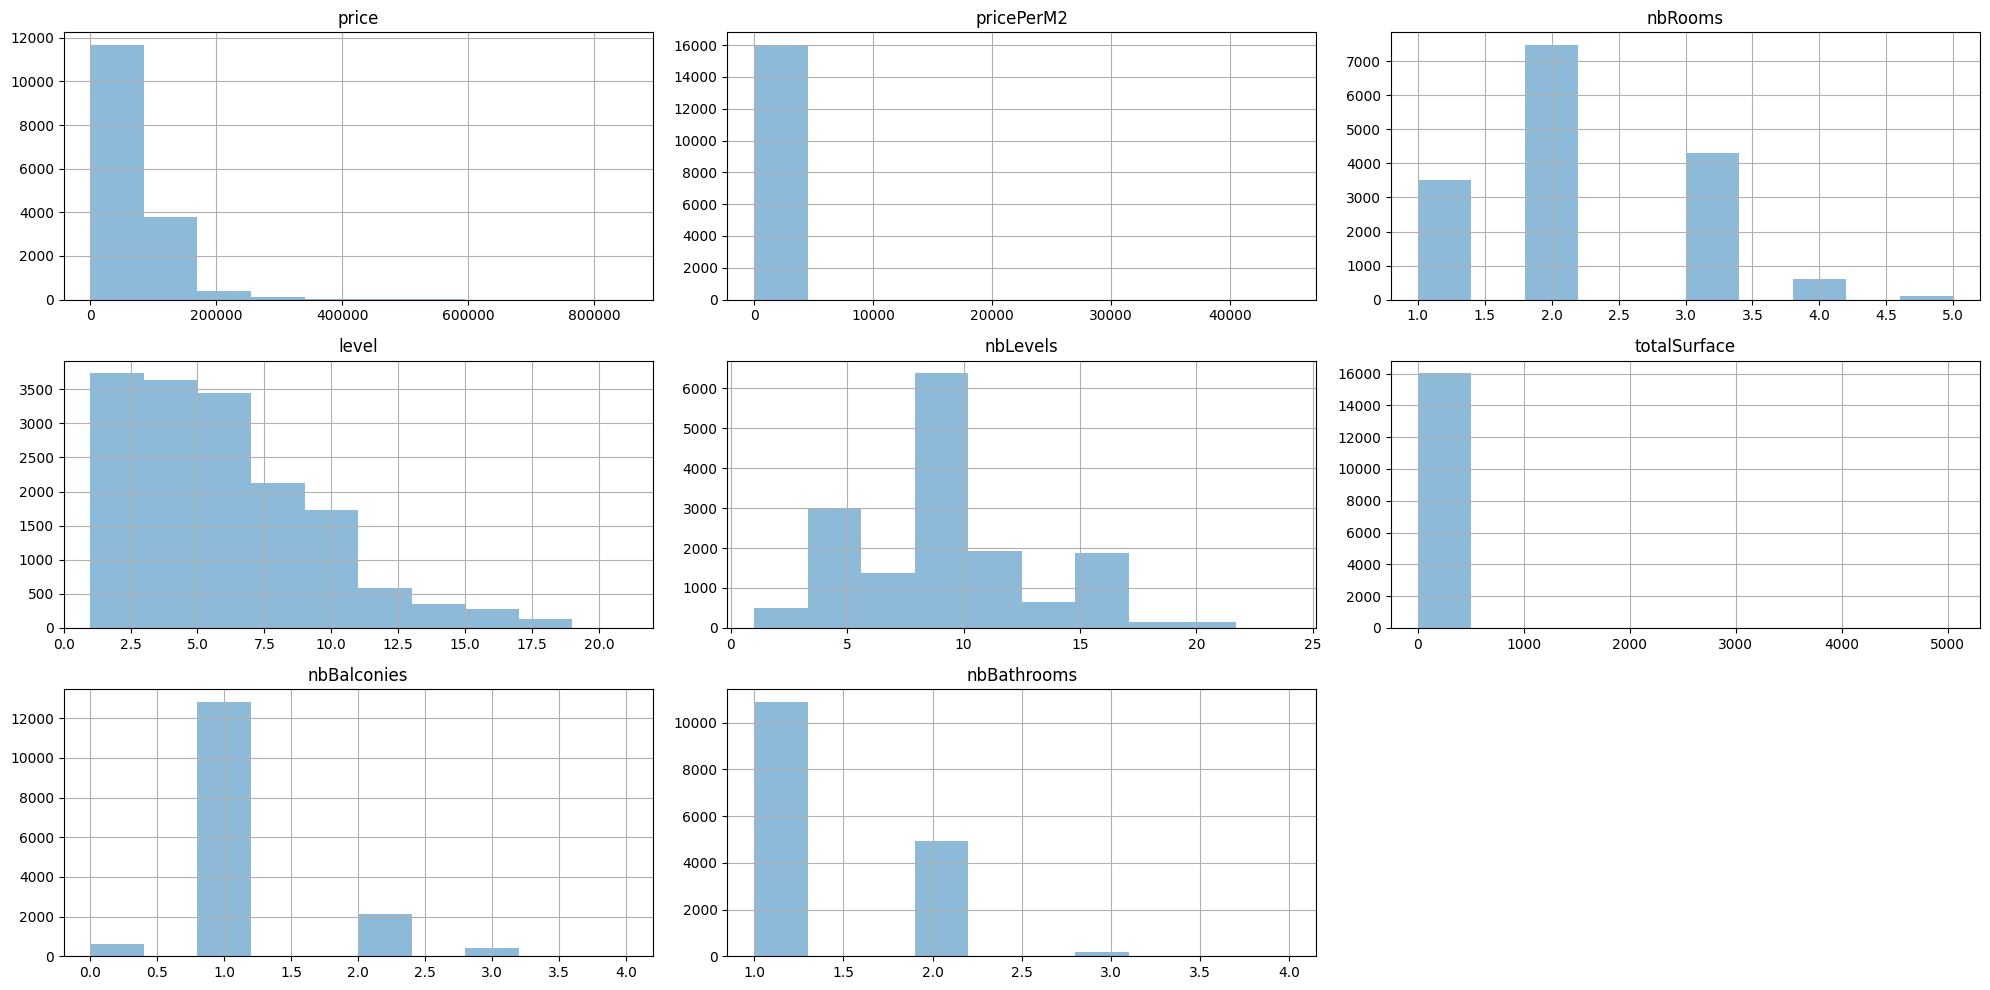

In [87]:
dataset.hist(alpha=0.5, figsize=(20,10))
plt.tight_layout()

array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='pricePerM2', ylabel='price'>,
        <AxesSubplot: xlabel='nbRooms', ylabel='price'>,
        <AxesSubplot: xlabel='level', ylabel='price'>,
        <AxesSubplot: xlabel='nbLevels', ylabel='price'>,
        <AxesSubplot: xlabel='totalSurface', ylabel='price'>,
        <AxesSubplot: xlabel='nbBalconies', ylabel='price'>,
        <AxesSubplot: xlabel='nbBathrooms', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='pricePerM2'>,
        <AxesSubplot: xlabel='pricePerM2', ylabel='pricePerM2'>,
        <AxesSubplot: xlabel='nbRooms', ylabel='pricePerM2'>,
        <AxesSubplot: xlabel='level', ylabel='pricePerM2'>,
        <AxesSubplot: xlabel='nbLevels', ylabel='pricePerM2'>,
        <AxesSubplot: xlabel='totalSurface', ylabel='pricePerM2'>,
        <AxesSubplot: xlabel='nbBalconies', ylabel='pricePerM2'>,
        <AxesSubplot: xlabel='nbBathrooms', ylabel='pricePerM2'>],
       [<AxesSubplot

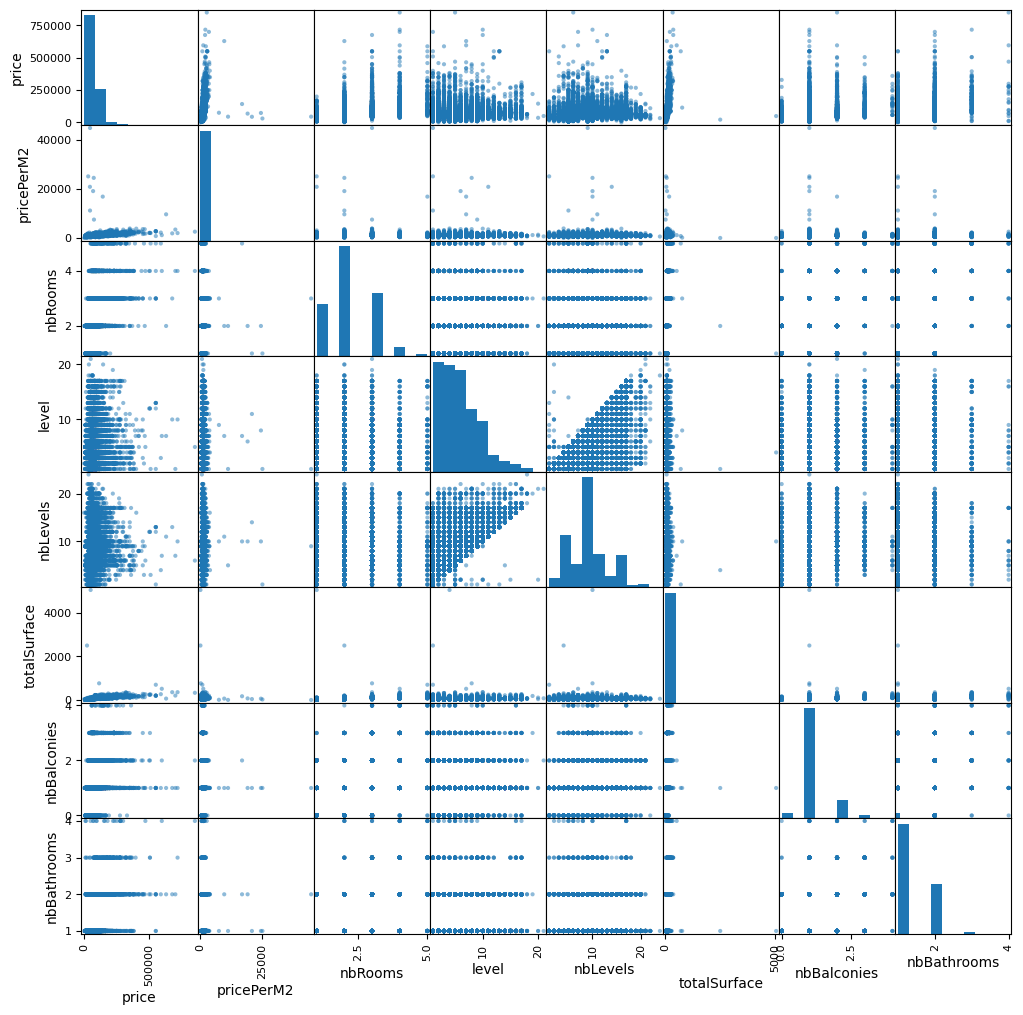

In [88]:
pd.plotting.scatter_matrix(dataset, figsize = (12,12))

C:\Users\abonta\AppData\Local\Temp\ipykernel_12172\2840160306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<AxesSubplot: >

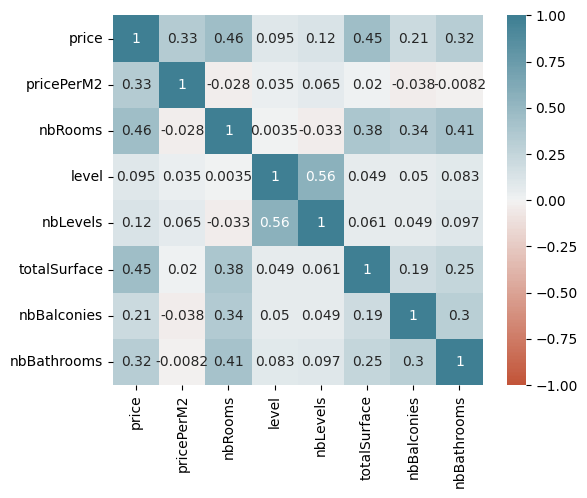

In [89]:
corr = dataset.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)

In [90]:
def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y + 20, f'{value:{fmt}}', ha='center', va='center', size='medium', color='black', weight='semibold')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

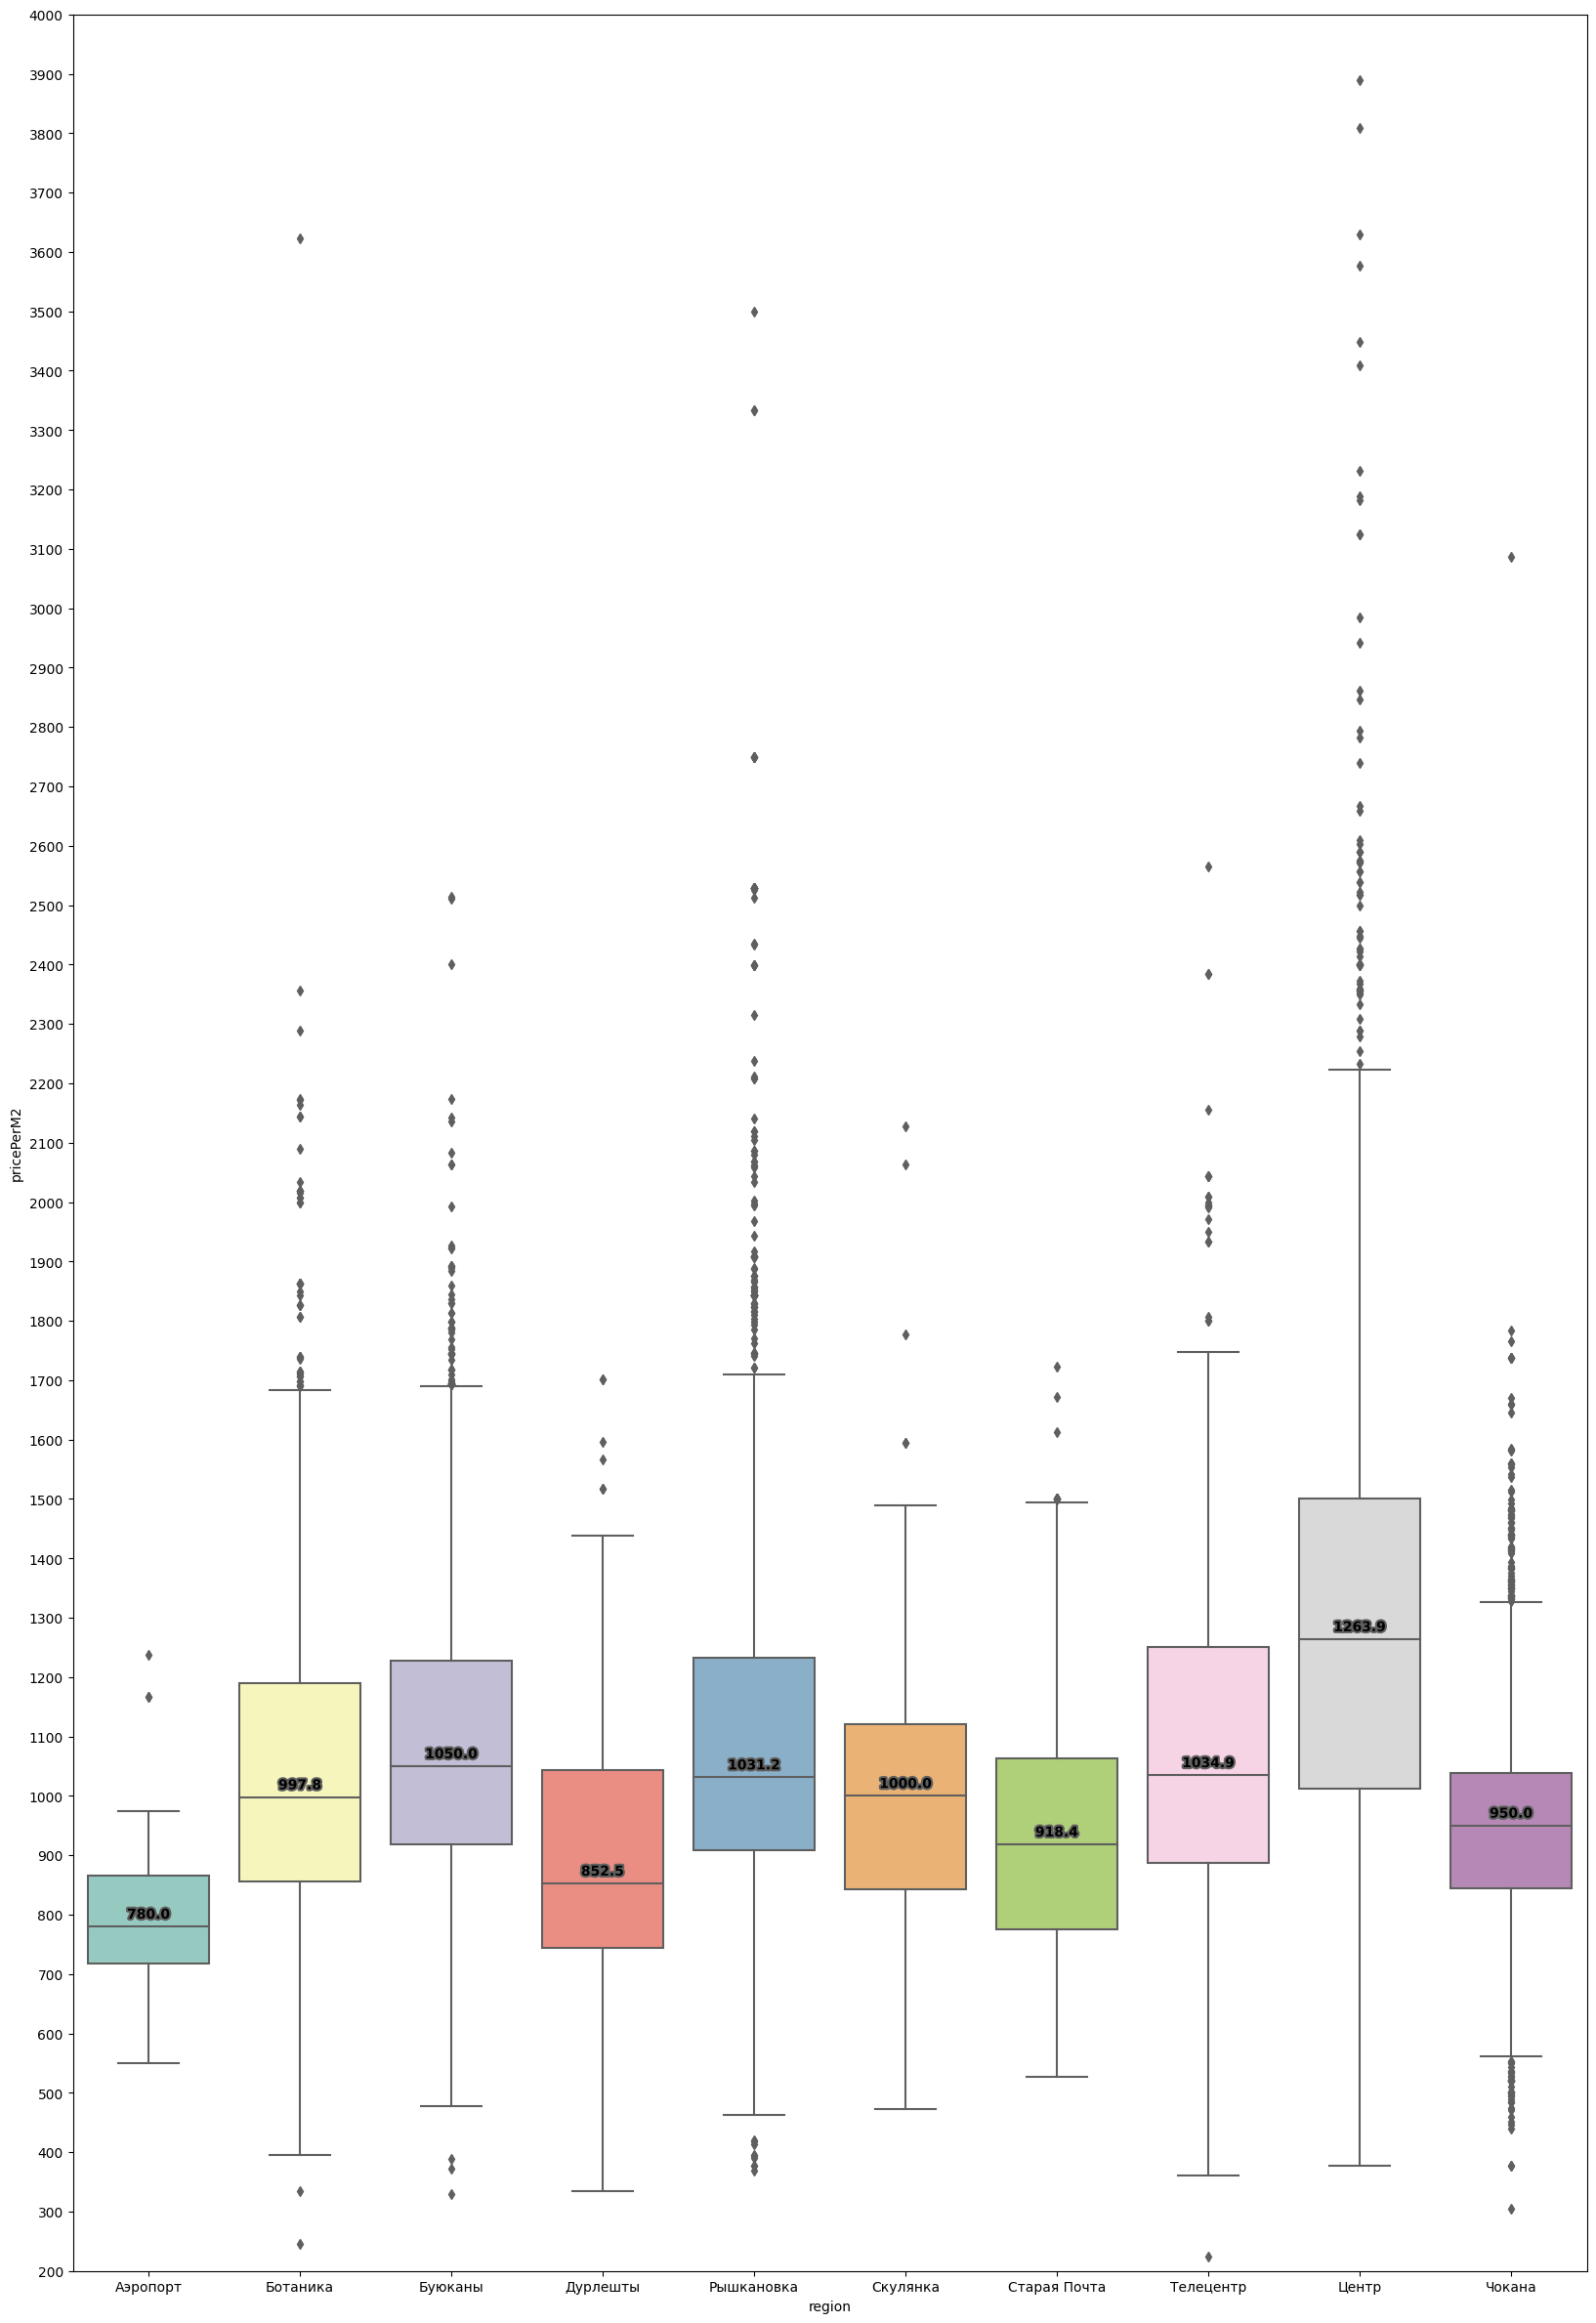

In [91]:
plt.figure(figsize=(20,30))
plt.ylim(200, 4000)
box_plot = sns.boxplot(x="region", y="pricePerM2", data=dataset, palette="Set3")

box_plot.yaxis.set_major_locator(ticker.MultipleLocator(100))
box_plot.yaxis.set_major_formatter(ticker.ScalarFormatter())

add_median_labels(box_plot)
plt.show()

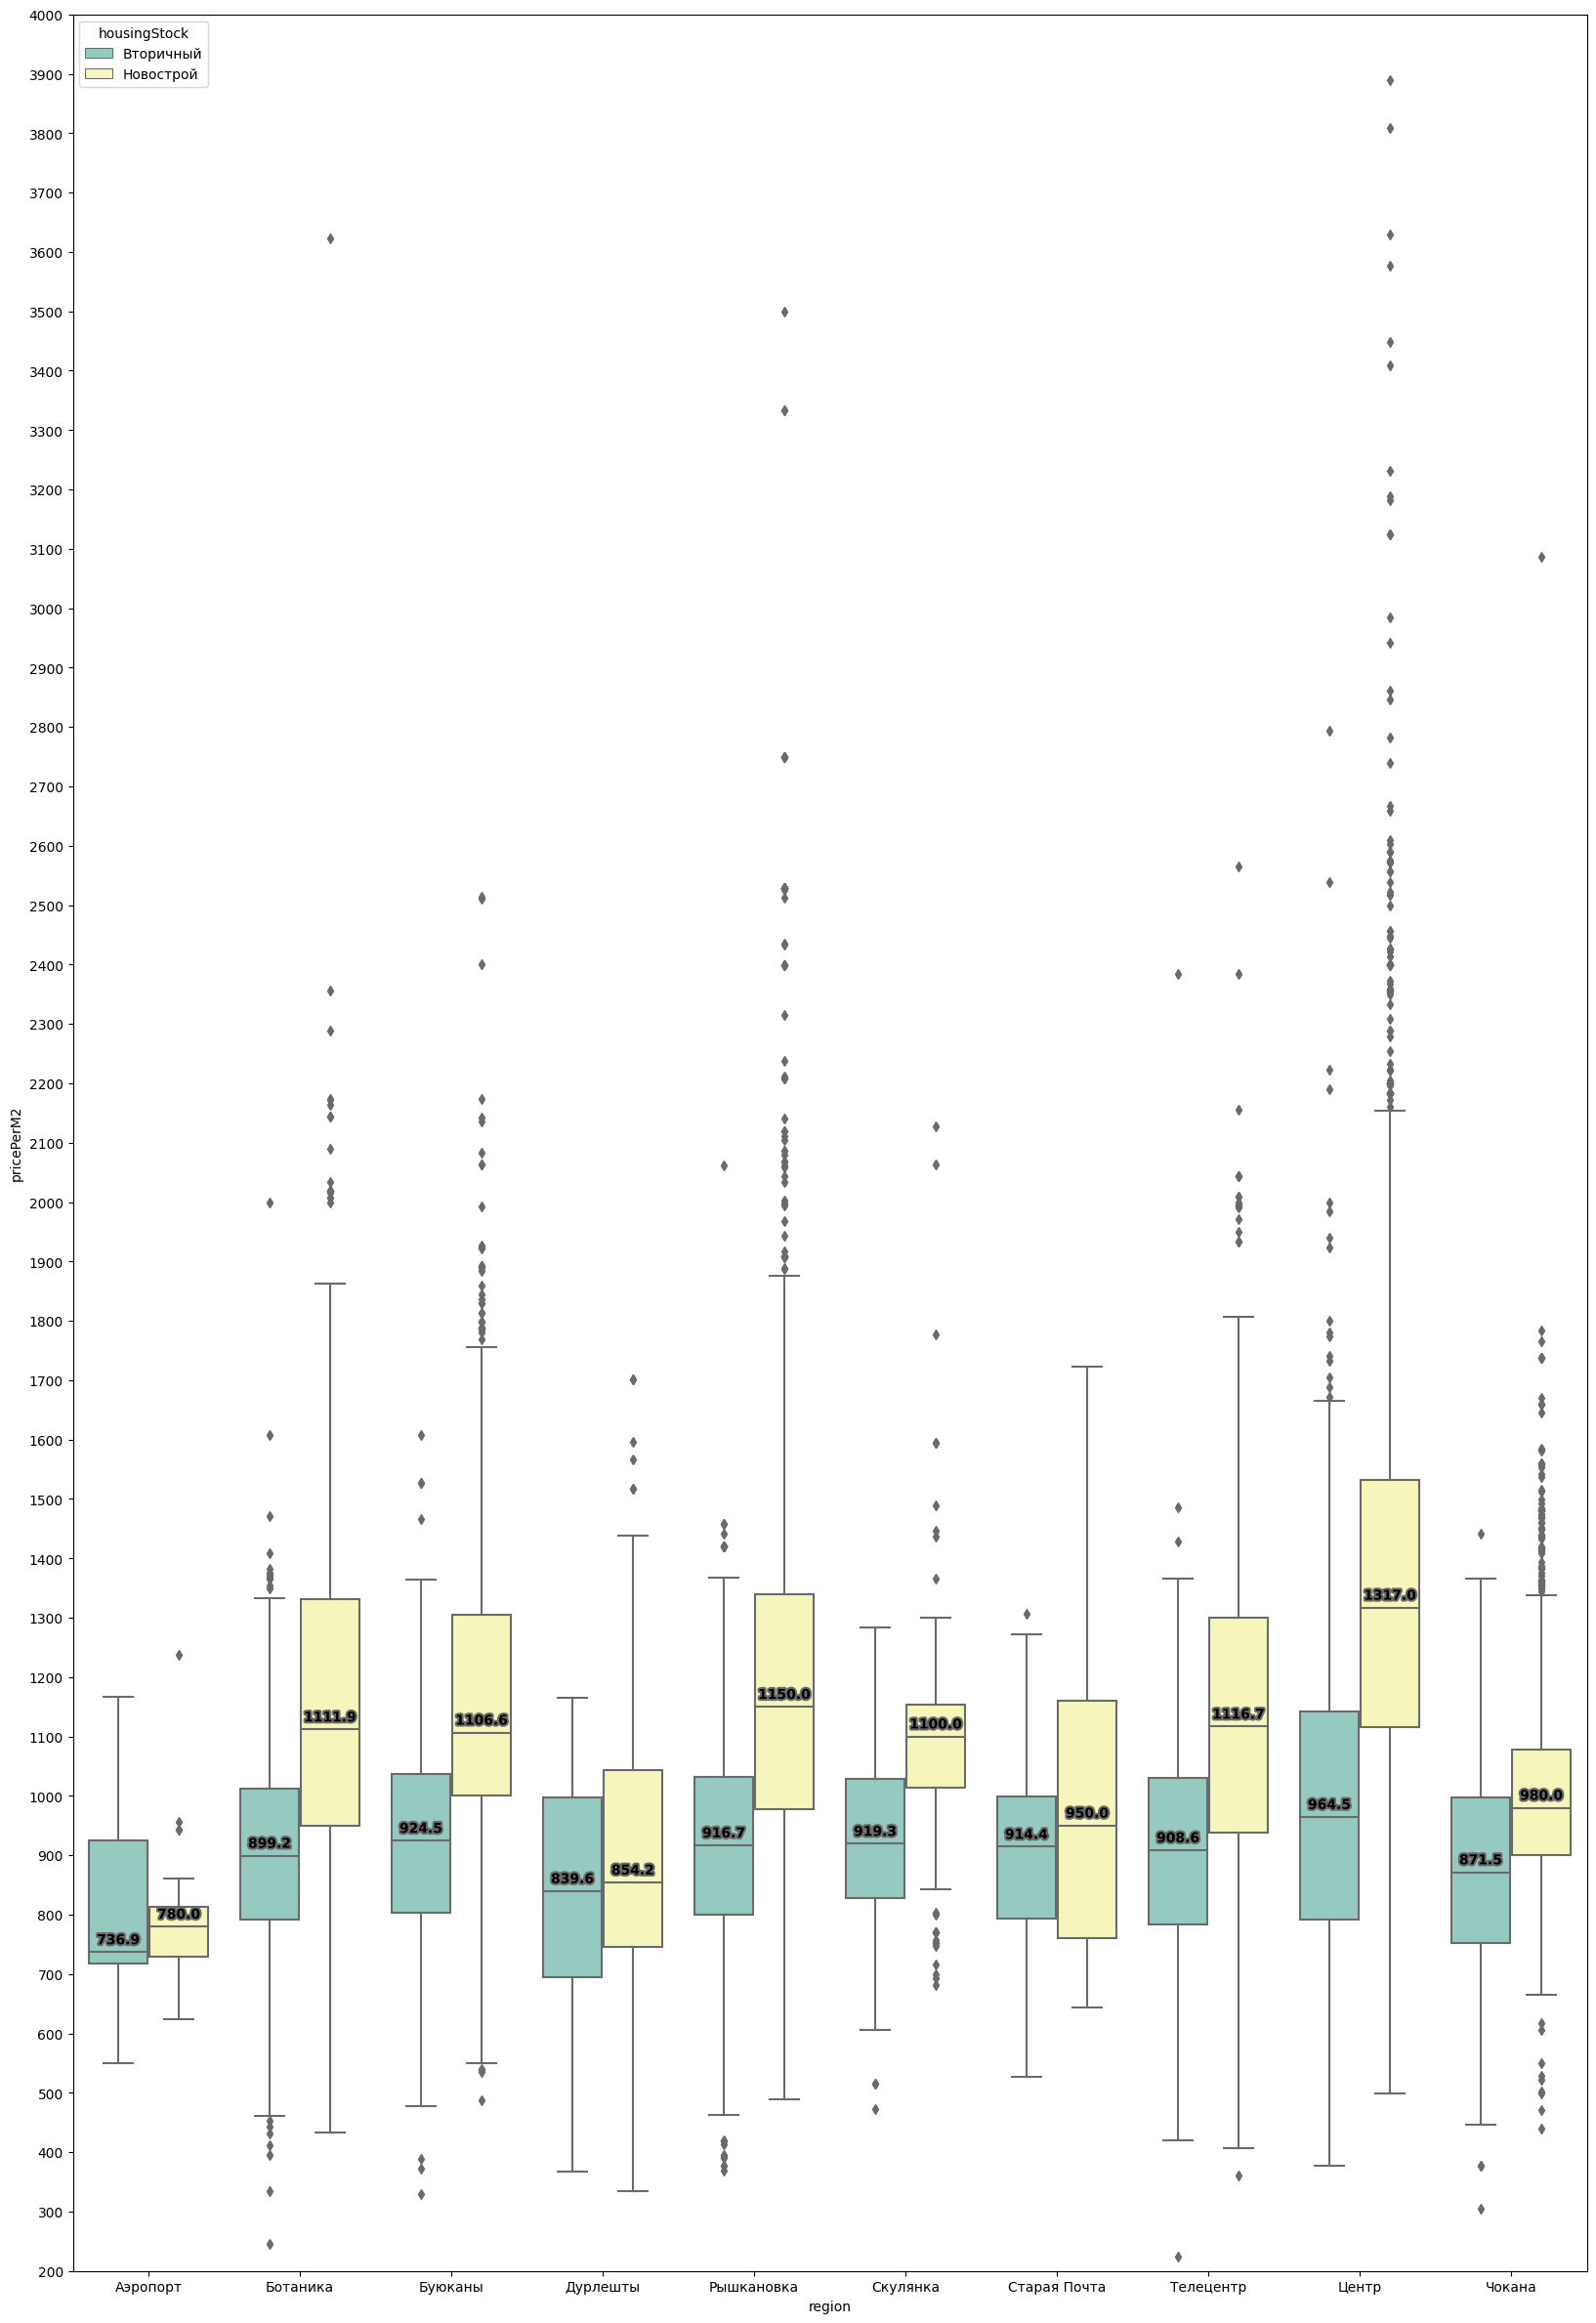

In [92]:
plt.figure(figsize=(20, 30))
plt.ylim(200, 4000)
box_plot = sns.boxplot(x="region", y="pricePerM2", hue='housingStock', data=dataset, palette="Set3")

box_plot.yaxis.set_major_locator(ticker.MultipleLocator(100))
box_plot.yaxis.set_major_formatter(ticker.ScalarFormatter())

add_median_labels(box_plot)
plt.show()

In [93]:
def printResultComparison(y_pred, y_test, limit=100):
    for i in range(0, limit):
        pred = y_pred[i]
        test = y_test[i]
        result = str([pred, test])
        if pred == test:
            result += " <-- right"
        print(result)

In [94]:
def accuracy_score_with_allowable_error(y_true, y_pred, precision):
    if len(y_true) != len(y_pred):
        return "The length of the arrays doesn't coincide"
    result = []
    for i in range(0, len(y_true)):
        true_value = y_true[i]
        pred_value = y_pred[i]
        min = true_value - true_value * precision
        max = true_value + true_value * precision
        result.append(min < pred_value < max)
    result = np.array(result, dtype=bool)
    return result.sum() / len(result)

In [95]:
dataset = pd.get_dummies(data=dataset, columns=['dwellingsState', 'parking', 'announceAuthor', 'housingStock', 'region'], drop_first=True)
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 0].values

In [96]:
print(X)

[[ 3.  5.  5. ...  1.  0.  0.]
 [ 1.  5.  5. ...  1.  0.  0.]
 [ 1.  9. 10. ...  0.  0.  0.]
 ...
 [ 2.  5.  5. ...  0.  0.  0.]
 [ 1.  5. 14. ...  0.  1.  0.]
 [ 1.  1.  8. ...  0.  0.  0.]]


In [97]:
print(y)

[255000.  21300.  58065. ...  17000.  38000.  56000.]


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [99]:
print(X_train)
len(X_train)

[[ 3.  2.  5. ...  0.  0.  0.]
 [ 2.  5.  5. ...  0.  0.  0.]
 [ 1.  6. 15. ...  0.  0.  0.]
 ...
 [ 1.  1.  9. ...  0.  0.  0.]
 [ 2.  8. 11. ...  0.  0.  0.]
 [ 1.  3. 13. ...  1.  0.  0.]]


12009

In [100]:
print(X_test)
len(X_test)

[[ 3.  7. 10. ...  0.  0.  0.]
 [ 1.  4.  5. ...  0.  0.  0.]
 [ 1.  8. 17. ...  0.  0.  0.]
 ...
 [ 2.  7. 10. ...  0.  0.  0.]
 [ 2.  8. 16. ...  0.  0.  0.]
 [ 2.  8. 12. ...  0.  0.  0.]]


4003

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import time

In [103]:
start_time = time.time()
from sklearn.linear_model import LogisticRegression
classifier_log_regr = LogisticRegression(random_state=0, max_iter=1000)
classifier_log_regr.fit(X_train, y_train)

y_pred_log_regr = classifier_log_regr.predict(X_test)
y_pred_train_log_regr = classifier_log_regr.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 193.99332547187805 seconds ---


In [104]:
print("Test split")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_log_regr)}")
print(f"r2_score: {r2_score(y_test, y_pred_log_regr)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_log_regr, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_log_regr, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_log_regr, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_log_regr, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_log_regr, 0.4)}")
print()
print("Train split")
print(f"accuracy_score: {accuracy_score(y_train, y_pred_train_log_regr)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_log_regr)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_log_regr, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_log_regr, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_log_regr, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_log_regr, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_log_regr, 0.4)}")

Test split
accuracy_score: 0.04096927304521609
r2_score: 0.4280102193662919
10% error: 0.3479890082438171
15% error: 0.47864101923557334
20% error: 0.5810642018486135
30% error: 0.7329502872845366
40% error: 0.8316262802897827

Train split
accuracy_score: 0.13698059788491965
r2_score: 0.5943002923586012
10% error: 0.41393954534099425
15% error: 0.5279373802981098
20% error: 0.6130402198351237
30% error: 0.7570988425347656
40% error: 0.8414522441502207


In [105]:
printResultComparison(y_test, y_pred_log_regr, 100)

[62000.0, 58500.0]
[25800.0, 25900.0]
[53500.0, 44000.0]
[60900.0, 58500.0]
[31000.0, 36500.0]
[34000.0, 24900.0]
[69450.0, 87500.0]
[85900.0, 72900.0]
[89000.0, 71050.0]
[88900.0, 87900.0]
[54500.0, 44500.0]
[59500.0, 71900.0]
[41500.0, 43500.0]
[38498.0, 46900.0]
[87900.0, 105000.0]
[78100.0, 98000.0]
[81000.0, 49900.0]
[73284.0, 78864.0]
[41900.0, 45500.0]
[177000.0, 95000.0]
[75000.0, 63900.0]
[63800.0, 63900.0]
[64900.0, 25000.0]
[97350.0, 142000.0]
[92000.0, 82500.0]
[70000.0, 77000.0]
[51900.0, 49900.0]
[154900.0, 105000.0]
[58950.0, 75650.0]
[90900.0, 69900.0]
[109900.0, 96400.0]
[82000.0, 82000.0] <-- right
[137000.0, 101000.0]
[38500.0, 37400.0]
[76800.0, 78500.0]
[76000.0, 52900.0]
[52500.0, 85500.0]
[39900.0, 32500.0]
[36000.0, 45000.0]
[63900.0, 41500.0]
[78900.0, 87500.0]
[270000.0, 273000.0]
[83000.0, 74750.0]
[26900.0, 32500.0]
[55000.0, 51900.0]
[63500.0, 75000.0]
[39900.0, 46900.0]
[57000.0, 46000.0]
[159000.0, 114900.0]
[52900.0, 59900.0]
[66900.0, 64900.0]
[63640.0,

In [106]:
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
classifier_k_neigh = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_k_neigh.fit(X_train, y_train)

y_pred_k_neigh = classifier_k_neigh.predict(X_test)
y_pred_train_k_neigh = classifier_k_neigh.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6841824054718018 seconds ---


In [107]:
print("Test split")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_k_neigh)}")
print(f"r2_score: {r2_score(y_test, y_pred_k_neigh)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_k_neigh, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_k_neigh, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_k_neigh, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_k_neigh, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_k_neigh, 0.4)}")
print()
print("Train split")
print(f"accuracy_score: {accuracy_score(y_train, y_pred_train_k_neigh)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_k_neigh)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_k_neigh, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_k_neigh, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_k_neigh, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_k_neigh, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_k_neigh, 0.4)}")

Test split
accuracy_score: 0.06520109917561828
r2_score: 0.34054568038449484
10% error: 0.3030227329502873
15% error: 0.40144891331501376
20% error: 0.4996252810392206
30% error: 0.6662503122658007
40% error: 0.7801648763427429

Train split
accuracy_score: 0.28053959530352235
r2_score: 0.46307065635691136
10% error: 0.4659005745690732
15% error: 0.5466733283370805
20% error: 0.6191189940877675
30% error: 0.7412773753018569
40% error: 0.8310433841285703


In [108]:
printResultComparison(y_test, y_pred_k_neigh, 100)

[62000.0, 50000.0]
[25800.0, 26000.0]
[53500.0, 50500.0]
[60900.0, 42500.0]
[31000.0, 35500.0]
[34000.0, 34500.0]
[69450.0, 65900.0]
[85900.0, 73300.0]
[89000.0, 78409.0]
[88900.0, 73900.0]
[54500.0, 54500.0] <-- right
[59500.0, 75600.0]
[41500.0, 30900.0]
[38498.0, 43900.0]
[87900.0, 74900.0]
[78100.0, 57064.0]
[81000.0, 62900.0]
[73284.0, 59762.0]
[41900.0, 43500.0]
[177000.0, 66900.0]
[75000.0, 75000.0] <-- right
[63800.0, 30000.0]
[64900.0, 48500.0]
[97350.0, 102000.0]
[92000.0, 54900.0]
[70000.0, 69900.0]
[51900.0, 39500.0]
[154900.0, 62500.0]
[58950.0, 55625.0]
[90900.0, 74900.0]
[109900.0, 57000.0]
[82000.0, 82000.0] <-- right
[137000.0, 74500.0]
[38500.0, 15900.0]
[76800.0, 69000.0]
[76000.0, 52000.0]
[52500.0, 70000.0]
[39900.0, 31500.0]
[36000.0, 29900.0]
[63900.0, 22000.0]
[78900.0, 70400.0]
[270000.0, 91600.0]
[83000.0, 65000.0]
[26900.0, 27300.0]
[55000.0, 51900.0]
[63500.0, 75000.0]
[39900.0, 8000.0]
[57000.0, 49500.0]
[159000.0, 89000.0]
[52900.0, 42000.0]
[66900.0, 6490

In [113]:
start_time = time.time()
from sklearn.linear_model import LinearRegression
classifier_lin_regr = LinearRegression()
classifier_lin_regr.fit(X_train, y_train)

y_pred_lin_regr = classifier_lin_regr.predict(X_test)
y_pred_train_lin_regr = classifier_lin_regr.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.007030963897705078 seconds ---


In [114]:
print("Test split")
# print(f"accuracy_score: {accuracy_score(y_test, y_pred_lin_regr)}")
print(f"r2_score: {r2_score(y_test, y_pred_lin_regr)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_lin_regr, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_lin_regr, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_lin_regr, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_lin_regr, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_lin_regr, 0.4)}")
print()
print("Train split")
# print(f"accuracy_score: {accuracy_score(y_test, y_pred_train_lin_regr)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_lin_regr)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_lin_regr, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_lin_regr, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_lin_regr, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_lin_regr, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_lin_regr, 0.4)}")

Test split
r2_score: 0.5539840246842288
10% error: 0.28253809642767924
15% error: 0.40969273045216087
20% error: 0.5158631026729953
30% error: 0.6872345740694479
40% error: 0.7926555083687234

Train split
r2_score: 0.536167955339999
10% error: 0.2817886585061204
15% error: 0.4029477891581314
20% error: 0.513281705387626
30% error: 0.6791572986926472
40% error: 0.7897410275626613


In [115]:
printResultComparison(y_test, y_pred_lin_regr, 100)

[62000.0, 70164.09287020814]
[25800.0, 17278.756150556423]
[53500.0, 39629.522605672275]
[60900.0, 55271.61311364603]
[31000.0, 16392.837004926536]
[34000.0, 28461.39032587158]
[69450.0, 73146.29750998433]
[85900.0, 65774.42489140977]
[89000.0, 93812.0745674369]
[88900.0, 91214.76399863226]
[54500.0, 53051.64683541137]
[59500.0, 72714.17697694164]
[41500.0, 56837.801603702996]
[38498.0, 36504.3866539185]
[87900.0, 109195.59302910304]
[78100.0, 75286.6986727723]
[81000.0, 94542.89741258898]
[73284.0, 86101.39150978862]
[41900.0, 44917.93543869426]
[177000.0, 101503.10715703279]
[75000.0, 65760.82892478498]
[63800.0, 63012.67434191838]
[64900.0, 52978.36438519003]
[97350.0, 112031.47097671241]
[92000.0, 79568.42835616144]
[70000.0, 68954.39796529728]
[51900.0, 39208.01903367266]
[154900.0, 131719.55339092098]
[58950.0, 69544.2895504722]
[90900.0, 86519.95387368603]
[109900.0, 108169.63620167878]
[82000.0, 73406.89985774593]
[137000.0, 114396.98855852189]
[38500.0, 25961.628426227348]
[76

In [116]:
start_time = time.time()
from sklearn.tree import DecisionTreeClassifier
classifier_dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
classifier_dec_tree.fit(X_train, y_train)

y_pred_dec_tree = classifier_lin_regr.predict(X_test)
y_pred_train_dec_tree = classifier_lin_regr.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.06296014785766602 seconds ---


In [117]:
print("Test split")
# print(f"accuracy_score: {accuracy_score(y_test, y_pred_dec_tree)}")
print(f"r2_score: {r2_score(y_test, y_pred_dec_tree)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_dec_tree, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_dec_tree, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_dec_tree, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_dec_tree, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_dec_tree, 0.4)}")
print()
print("Train split")
# print(f"accuracy_score: {accuracy_score(y_test, y_pred_train_dec_tree)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_dec_tree)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_dec_tree, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_dec_tree, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_dec_tree, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_dec_tree, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_dec_tree, 0.4)}")

Test split
r2_score: 0.5539840246842288
10% error: 0.28253809642767924
15% error: 0.40969273045216087
20% error: 0.5158631026729953
30% error: 0.6872345740694479
40% error: 0.7926555083687234

Train split
r2_score: 0.536167955339999
10% error: 0.2817886585061204
15% error: 0.4029477891581314
20% error: 0.513281705387626
30% error: 0.6791572986926472
40% error: 0.7897410275626613


In [118]:
printResultComparison(y_test, y_pred_dec_tree, 100)

[62000.0, 70164.09287020814]
[25800.0, 17278.756150556423]
[53500.0, 39629.522605672275]
[60900.0, 55271.61311364603]
[31000.0, 16392.837004926536]
[34000.0, 28461.39032587158]
[69450.0, 73146.29750998433]
[85900.0, 65774.42489140977]
[89000.0, 93812.0745674369]
[88900.0, 91214.76399863226]
[54500.0, 53051.64683541137]
[59500.0, 72714.17697694164]
[41500.0, 56837.801603702996]
[38498.0, 36504.3866539185]
[87900.0, 109195.59302910304]
[78100.0, 75286.6986727723]
[81000.0, 94542.89741258898]
[73284.0, 86101.39150978862]
[41900.0, 44917.93543869426]
[177000.0, 101503.10715703279]
[75000.0, 65760.82892478498]
[63800.0, 63012.67434191838]
[64900.0, 52978.36438519003]
[97350.0, 112031.47097671241]
[92000.0, 79568.42835616144]
[70000.0, 68954.39796529728]
[51900.0, 39208.01903367266]
[154900.0, 131719.55339092098]
[58950.0, 69544.2895504722]
[90900.0, 86519.95387368603]
[109900.0, 108169.63620167878]
[82000.0, 73406.89985774593]
[137000.0, 114396.98855852189]
[38500.0, 25961.628426227348]
[76

In [119]:
start_time = time.time()
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', random_state=0)
classifier_svm.fit(X_train, y_train)

y_pred_svm = classifier_svm.predict(X_test)
y_pred_train_svm = classifier_svm.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1247.007922410965 seconds ---


In [120]:
print("Test split")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_svm)}")
print(f"r2_score: {r2_score(y_test, y_pred_svm)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_svm, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_svm, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_svm, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_svm, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_svm, 0.4)}")
print()
print("Train split")
print(f"accuracy_score: {accuracy_score(y_train, y_pred_train_svm)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_svm)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_svm, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_svm, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_svm, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_svm, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_svm, 0.4)}")

Test split
accuracy_score: 0.05121159130652011
r2_score: 0.4326913345828405
10% error: 0.32425680739445417
15% error: 0.45216087934049465
20% error: 0.5410941793654759
30% error: 0.7094678990756932
40% error: 0.810891831126655

Train split
accuracy_score: 0.11058372887001415
r2_score: 0.45912193011743696
10% error: 0.3691398118078108
15% error: 0.47864101923557334
20% error: 0.5650761928553585
30% error: 0.7142143392455659
40% error: 0.8076442667999001


In [121]:
printResultComparison(y_test, y_pred_svm, 100)

[62000.0, 59900.0]
[25800.0, 41500.0]
[53500.0, 67900.0]
[60900.0, 58500.0]
[31000.0, 45000.0]
[34000.0, 41500.0]
[69450.0, 73500.0]
[85900.0, 79900.0]
[89000.0, 69900.0]
[88900.0, 69900.0]
[54500.0, 45000.0]
[59500.0, 79900.0]
[41500.0, 45000.0]
[38498.0, 46900.0]
[87900.0, 95000.0]
[78100.0, 98000.0]
[81000.0, 49900.0]
[73284.0, 73500.0]
[41900.0, 46500.0]
[177000.0, 95000.0]
[75000.0, 75000.0] <-- right
[63800.0, 63900.0]
[64900.0, 65000.0]
[97350.0, 94900.0]
[92000.0, 56000.0]
[70000.0, 77000.0]
[51900.0, 49900.0]
[154900.0, 105000.0]
[58950.0, 69900.0]
[90900.0, 69900.0]
[109900.0, 57000.0]
[82000.0, 82000.0] <-- right
[137000.0, 95000.0]
[38500.0, 39500.0]
[76800.0, 79900.0]
[76000.0, 59900.0]
[52500.0, 75000.0]
[39900.0, 54900.0]
[36000.0, 45000.0]
[63900.0, 41500.0]
[78900.0, 87500.0]
[270000.0, 95000.0]
[83000.0, 65000.0]
[26900.0, 45000.0]
[55000.0, 59900.0]
[63500.0, 75000.0]
[39900.0, 59900.0]
[57000.0, 63900.0]
[159000.0, 114900.0]
[52900.0, 59900.0]
[66900.0, 64900.0]
[63

In [122]:
start_time = time.time()
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

y_pred_nb = classifier_nb.predict(X_test)
y_pred_train_nb = classifier_nb.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.852300405502319 seconds ---


In [123]:
print("Test split")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_nb)}")
print(f"r2_score: {r2_score(y_test, y_pred_nb)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_nb, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_nb, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_nb, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_nb, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_nb, 0.4)}")
print()
print("Train split")
print(f"accuracy_score: {accuracy_score(y_train, y_pred_train_nb)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_nb)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_nb, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_nb, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_nb, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_nb, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_nb, 0.4)}")

Test split
accuracy_score: 0.012240819385460905
r2_score: -0.20098627843752603
10% error: 0.2618036472645516
15% error: 0.35323507369472895
20% error: 0.44841368973270046
30% error: 0.6020484636522608
40% error: 0.704471646265301

Train split
accuracy_score: 0.16529269714380881
r2_score: 0.06030227839618696
10% error: 0.3717212090931801
15% error: 0.44907985677408613
20% error: 0.5307685902239987
30% error: 0.6524273461570489
40% error: 0.7379465400949288


In [124]:
printResultComparison(y_test, y_pred_nb, 100)

[62000.0, 58400.0]
[25800.0, 27400.0]
[53500.0, 57200.0]
[60900.0, 59200.0]
[31000.0, 41700.0]
[34000.0, 35200.0]
[69450.0, 48300.0]
[85900.0, 57200.0]
[89000.0, 73300.0]
[88900.0, 73300.0]
[54500.0, 51750.0]
[59500.0, 61950.0]
[41500.0, 46750.0]
[38498.0, 46300.0]
[87900.0, 121000.0]
[78100.0, 91200.0]
[81000.0, 52800.0]
[73284.0, 49520.0]
[41900.0, 65700.0]
[177000.0, 163000.0]
[75000.0, 68400.0]
[63800.0, 68400.0]
[64900.0, 79700.0]
[97350.0, 151000.0]
[92000.0, 156000.0]
[70000.0, 75600.0]
[51900.0, 45400.0]
[154900.0, 110700.0]
[58950.0, 58950.0] <-- right
[90900.0, 72700.0]
[109900.0, 85800.0]
[82000.0, 82050.0]
[137000.0, 310000.0]
[38500.0, 43300.0]
[76800.0, 56400.0]
[76000.0, 59700.0]
[52500.0, 194900.0]
[39900.0, 29700.0]
[36000.0, 55999.0]
[63900.0, 44990.0]
[78900.0, 70400.0]
[270000.0, 123000.0]
[83000.0, 121000.0]
[26900.0, 27999.0]
[55000.0, 51800.0]
[63500.0, 89990.0]
[39900.0, 39999.0]
[57000.0, 57200.0]
[159000.0, 152000.0]
[52900.0, 47300.0]
[66900.0, 64077.0]
[6364

In [125]:
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier_rand_for = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rand_for.fit(X_train, y_train)

y_pred_rand_for = classifier_rand_for.predict(X_test)
y_pred_train_rand_for = classifier_rand_for.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 7.872144460678101 seconds ---


In [126]:
print("Test split")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_rand_for)}")
print(f"r2_score: {r2_score(y_test, y_pred_rand_for)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for, 0.4)}")
print()
print("Train split")
print(f"accuracy_score: {accuracy_score(y_train, y_pred_train_rand_for)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_rand_for)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for, 0.4)}")

Test split
accuracy_score: 0.16337746689982513
r2_score: 0.6035895451566375
10% error: 0.5488383712215839
15% error: 0.6470147389457906
20% error: 0.7239570322258306
30% error: 0.8366225331001749
40% error: 0.9048213839620285

Train split
accuracy_score: 0.9371304854692314
r2_score: 0.9968110333790333
10% error: 0.9855941377300358
15% error: 0.9904238487800816
20% error: 0.9933383295861438
30% error: 0.9970022483137647
40% error: 0.9982513115163627


In [127]:
printResultComparison(y_test, y_pred_rand_for, 100)

[62000.0, 50000.0]
[25800.0, 34500.0]
[53500.0, 51900.0]
[60900.0, 68500.0]
[31000.0, 33500.0]
[34000.0, 36900.0]
[69450.0, 48300.0]
[85900.0, 86000.0]
[89000.0, 95000.0]
[88900.0, 83880.0]
[54500.0, 54500.0] <-- right
[59500.0, 69900.0]
[41500.0, 41500.0] <-- right
[38498.0, 49000.0]
[87900.0, 91900.0]
[78100.0, 67229.0]
[81000.0, 52900.0]
[73284.0, 68764.0]
[41900.0, 36900.0]
[177000.0, 97000.0]
[75000.0, 75000.0] <-- right
[63800.0, 59500.0]
[64900.0, 45900.0]
[97350.0, 71900.0]
[92000.0, 105000.0]
[70000.0, 69900.0]
[51900.0, 52900.0]
[154900.0, 160200.0]
[58950.0, 58950.0] <-- right
[90900.0, 93000.0]
[109900.0, 96400.0]
[82000.0, 82000.0] <-- right
[137000.0, 51900.0]
[38500.0, 37400.0]
[76800.0, 90000.0]
[76000.0, 45400.0]
[52500.0, 52000.0]
[39900.0, 42000.0]
[36000.0, 17900.0]
[63900.0, 63900.0] <-- right
[78900.0, 82000.0]
[270000.0, 273000.0]
[83000.0, 66000.0]
[26900.0, 26900.0] <-- right
[55000.0, 50500.0]
[63500.0, 63500.0] <-- right
[39900.0, 21560.0]
[57000.0, 56000.0]


In [128]:
start_time = time.time()
from sklearn.ensemble import RandomForestRegressor
classifier_rand_for_regr = RandomForestRegressor(n_estimators=10, criterion='mse', random_state=0)
classifier_rand_for_regr.fit(X_train, y_train)

y_pred_rand_for_regr = classifier_rand_for_regr.predict(X_test)
y_pred_train_rand_for_regr = classifier_rand_for_regr.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\abonta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


--- 0.5470731258392334 seconds ---


In [129]:
print("Test split")
# print(f"accuracy_score: {accuracy_score(y_test, y_pred_rand_for_regr)}")
print(f"r2_score: {r2_score(y_test, y_pred_rand_for_regr)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr, 0.4)}")
print()
print("Train split")
# print(f"accuracy_score: {accuracy_score(y_train, y_pred_train_rand_for_regr)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_rand_for_regr)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr, 0.4)}")

Test split
r2_score: 0.7985087356589458
10% error: 0.5935548338745941
15% error: 0.7244566575068698
20% error: 0.8113914564076943
30% error: 0.9103172620534599
40% error: 0.9517861603797152

Train split
r2_score: 0.9624819192229521
10% error: 0.862852860354734
15% error: 0.9331334832209176
20% error: 0.9657756682488133
30% error: 0.9863435756515946
40% error: 0.9930885169456242


In [130]:
printResultComparison(y_test, y_pred_rand_for_regr, 100)

[62000.0, 55424.95]
[25800.0, 22635.0]
[53500.0, 47887.5]
[60900.0, 59100.0]
[31000.0, 34813.03333333333]
[34000.0, 35770.95238095238]
[69450.0, 68595.0]
[85900.0, 63305.0]
[89000.0, 100650.0]
[88900.0, 74022.0]
[54500.0, 53550.0]
[59500.0, 66935.0]
[41500.0, 42118.6]
[38498.0, 48801.66666666667]
[87900.0, 95915.0]
[78100.0, 72433.7]
[81000.0, 60930.0]
[73284.0, 68106.7]
[41900.0, 47763.0]
[177000.0, 102880.0]
[75000.0, 75000.0] <-- right
[63800.0, 63898.8]
[64900.0, 61389.0]
[97350.0, 105400.0]
[92000.0, 68420.0]
[70000.0, 71180.0]
[51900.0, 49820.0]
[154900.0, 166850.0]
[58950.0, 58822.0]
[90900.0, 91990.0]
[109900.0, 108600.0]
[82000.0, 81775.34794372294]
[137000.0, 105335.0]
[38500.0, 42712.44880952381]
[76800.0, 85574.0]
[76000.0, 53270.0]
[52500.0, 52450.0]
[39900.0, 45987.222222222226]
[36000.0, 36100.0]
[63900.0, 63600.0]
[78900.0, 78610.8]
[270000.0, 256030.0]
[83000.0, 69437.0]
[26900.0, 24740.0]
[55000.0, 54100.0]
[63500.0, 76572.75714285714]
[39900.0, 35202.0]
[57000.0, 574

In [74]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from pprint import pprint
pprint(classifier_rand_for_regr.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [60]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [131]:
start_time = time.time()
from sklearn.ensemble import RandomForestRegressor
classifier_rand_for_regr_tuned = RandomForestRegressor(n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=True, random_state=0)
classifier_rand_for_regr_tuned.fit(X_train, y_train)

y_pred_rand_for_regr_tuned = classifier_rand_for_regr_tuned.predict(X_test)
y_pred_train_rand_for_regr_tuned = classifier_rand_for_regr_tuned.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 20.350542783737183 seconds ---


In [132]:
print("Test split")
# print(f"accuracy_score: {accuracy_score(y_test, y_pred_rand_for_regr_tuned)}")
print(f"r2_score: {r2_score(y_test, y_pred_rand_for_regr_tuned)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr_tuned, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr_tuned, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr_tuned, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr_tuned, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_test, y_pred_rand_for_regr_tuned, 0.4)}")
print()
print("Train split")
# print(f"accuracy_score: {accuracy_score(y_train, y_pred_train_rand_for_regr_tuned)}")
print(f"r2_score: {r2_score(y_train, y_pred_train_rand_for_regr_tuned)}")
print(f"10% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr_tuned, 0.1)}")
print(f"15% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr_tuned, 0.15)}")
print(f"20% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr_tuned, 0.2)}")
print(f"30% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr_tuned, 0.3)}")
print(f"40% error: {accuracy_score_with_allowable_error(y_train, y_pred_train_rand_for_regr_tuned, 0.4)}")

Test split
r2_score: 0.8109747787862343
10% error: 0.5928053959530353
15% error: 0.7257057207094679
20% error: 0.8196352735448413
30% error: 0.9125655758181364
40% error: 0.9562827879090682

Train split
r2_score: 0.9749900932922354
10% error: 0.8838371221583812
15% error: 0.9500374718960779
20% error: 0.9755183612290782
30% error: 0.9911732867016404
40% error: 0.9962528103922058


In [76]:
printResultComparison(y_test, y_pred_rand_for_regr, 100)

[62000.0, 55424.95]
[25800.0, 22635.0]
[53500.0, 47887.5]
[60900.0, 59100.0]
[31000.0, 34813.03333333333]
[34000.0, 35770.95238095238]
[69450.0, 68595.0]
[85900.0, 63305.0]
[89000.0, 100650.0]
[88900.0, 74022.0]
[54500.0, 53550.0]
[59500.0, 66935.0]
[41500.0, 42118.6]
[38498.0, 48801.66666666667]
[87900.0, 95915.0]
[78100.0, 72433.7]
[81000.0, 60930.0]
[73284.0, 68106.7]
[41900.0, 47763.0]
[177000.0, 102880.0]
[75000.0, 75000.0] <-- right
[63800.0, 63898.8]
[64900.0, 61389.0]
[97350.0, 105400.0]
[92000.0, 68420.0]
[70000.0, 71180.0]
[51900.0, 49820.0]
[154900.0, 166850.0]
[58950.0, 58822.0]
[90900.0, 91990.0]
[109900.0, 108600.0]
[82000.0, 81775.34794372294]
[137000.0, 105335.0]
[38500.0, 42712.44880952381]
[76800.0, 85574.0]
[76000.0, 53270.0]
[52500.0, 52450.0]
[39900.0, 45987.222222222226]
[36000.0, 36100.0]
[63900.0, 63600.0]
[78900.0, 78610.8]
[270000.0, 256030.0]
[83000.0, 69437.0]
[26900.0, 24740.0]
[55000.0, 54100.0]
[63500.0, 76572.75714285714]
[39900.0, 35202.0]
[57000.0, 574

- min square error,
- mean absolute error,
- don't include classifier model in report (only regressions) because we are predicting continous data (price),
- cross validation + explain it in final report,
- cross validation (with at least 10)